# 1. Introduction

O gerenciamento de riscos de crédito desempenha um papel fundamental no setor financeiro, ajudando as instituições a avaliar a probabilidade de inadimplência de clientes em potencial. Em um contexto onde a análise de dados desempenha um papel cada vez mais importante, a aplicação de algoritmos de aprendizado de máquina torna-se uma ferramenta tima  para prever o comportamento dos tomadores de empréstimos.

Neste projeto de capstone, explorarei o conjunto de dados "German Credit Risk - With Target",disponivel no “Kaggle” que fornece informações sobre clientes de bancos alemães, incluindo características como idade, renda, histórico de crédito e o status de inadimplência em empréstimos anteriores. O objetivo principal é desenvolver e executar um modelo de aprendizado de máquina capaz de prever se um cliente será inadimplente em um empréstimo futuro, com base em suas características individuais.

A metodologia adotada segue uma abordagem de gerenciamento de projetos, priorizando etapas como análise exploratória de dados, pré-processamento de dados, implementação de algoritmos de aprendizado de máquina e apresentação eficaz das descobertas. 
Ao final deste projeto, espero não apenas desenvolver um modelo preditivo robusto, mas também fornecer insights que possam contribuir para uma análise mais precisa e eficaz do risco de crédito, beneficiando tanto as instituições financeiras quanto os clientes em potencial.


# Importing Libraries 

In [283]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True)                  # this code, allow us to work with offline plotly version
import plotly.graph_objs as go                         # it's like "plt" of matplot
import plotly.tools as tls                             # It's useful to we get some tools of plotly
from collections import Counter                        # To do counter of some features
import plotly.figure_factory as ff




from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV                                         # to split the data
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score     # to evaluate our model

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


import warnings

from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)


# 2. EDA (Exploratory of Data Analysis)

Exploração de Dados:
A exploração de dados é realizada para entender melhor as características dos dados e identificar padrões ou tendências. Isso pode incluir a criação de gráficos, histogramas e matrizes de correlação.



In [285]:
dataframe = pd.read_csv("german_credit_data.csv")
df = pd.read_csv("german_credit_data.csv")

In [286]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [287]:
df.shape

(1000, 11)

Checando valores ausentes ou nulos e datatype

In [288]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [289]:
# Substituir os valores nulos nas colunas 'Saving accounts' e 'Checking account' pela categoria 'unknown'
df['Saving accounts'].fillna('unknown', inplace=True)
df['Checking account'].fillna('unknown', inplace=True)


 Irei tratar os valores nulos nas colunas 'Saving accounts' e 'Checking account', substituindo-os pela categoria 'unknown'permitindo manter os registros no conjunto de dados e evitar a perda de informações.

In [290]:
df.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [292]:
print(df.columns)

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


Visualizando variavel target

In [293]:

print(df['Risk'].value_counts())


Risk
good    700
bad     300
Name: count, dtype: int64


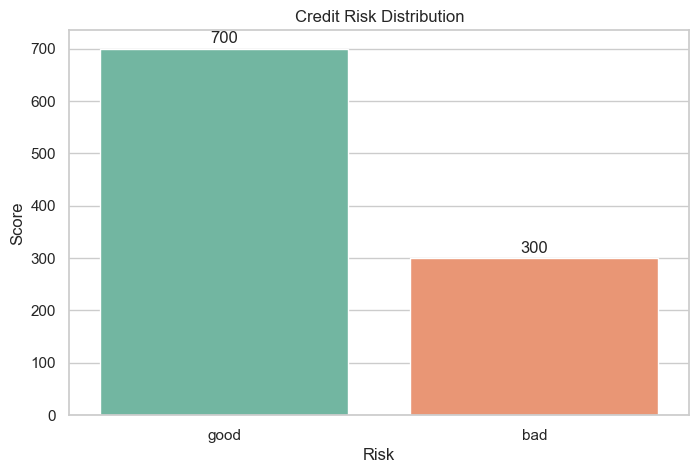

In [294]:
labels = ['good', 'bad']
values = [700, 300]

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=values, palette='Set2')
plt.title('Credit Risk Distribution')
plt.xlabel('Risk')
plt.ylabel('Score')

for i in range(len(labels)):
    plt.text(i, values[i] + 10, f'{values[i]}', ha='center')

plt.show()

In [295]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


# 2.2. Exploratory analysis of variables

Calculando Estatísticas Descritivas das variáveis numéricas

In [296]:
print(df.describe())

        Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000


Idade (Age): A idade média dos clientes é de aproximadamente 35.55 anos, com um desvio padrão de aproximadamente 11.38 anos.
A idade varia entre 19 e 75 anos, com a maioria dos clientes (50%) tendo idade igual ou inferior a 33 anos.
A distribuição de idade parece ser razoavelmente simétrica, com um pequeno desvio padrão, o que indica que a idade dos clientes não varia muito em relação à média.

Ocupação (Job):A média da variável de ocupação é aproximadamente 1.90, o que sugere que a maioria dos clientes tem uma ocupação classificada como 2 (o significado específico de cada categoria não está claro neste contexto).
A variável de ocupação varia entre 0 e 3, com a maioria dos clientes (50%) tendo uma ocupação igual a 2.

Valor do Crédito (Credit amount):O valor médio do crédito solicitado pelos clientes é de aproximadamente 3271.26 unidades monetárias, com um desvio padrão considerável de aproximadamente 2822.74.
Os valores do crédito variam entre 250 e 18424 unidades monetárias, com a maioria dos clientes (50%) solicitando um valor de crédito igual ou inferior a 2319.50 unidades monetárias.
A distribuição do valor do crédito parece ser bastante variada, com um desvio padrão alto, indicando uma grande dispersão dos valores em relação à média.

Duração (Duration):A média da duração do empréstimo é de aproximadamente 20.90 meses, com um desvio padrão de aproximadamente 12.06 meses.
A duração varia entre 4 e 72 meses, com a maioria dos empréstimos (50%) tendo uma duração igual ou inferior a 18 meses.
A distribuição da duração do empréstimo também parece ser bastante variada, com um desvio padrão relativamente alto em relação à média.

Número de Variáveis Numéricas:  5


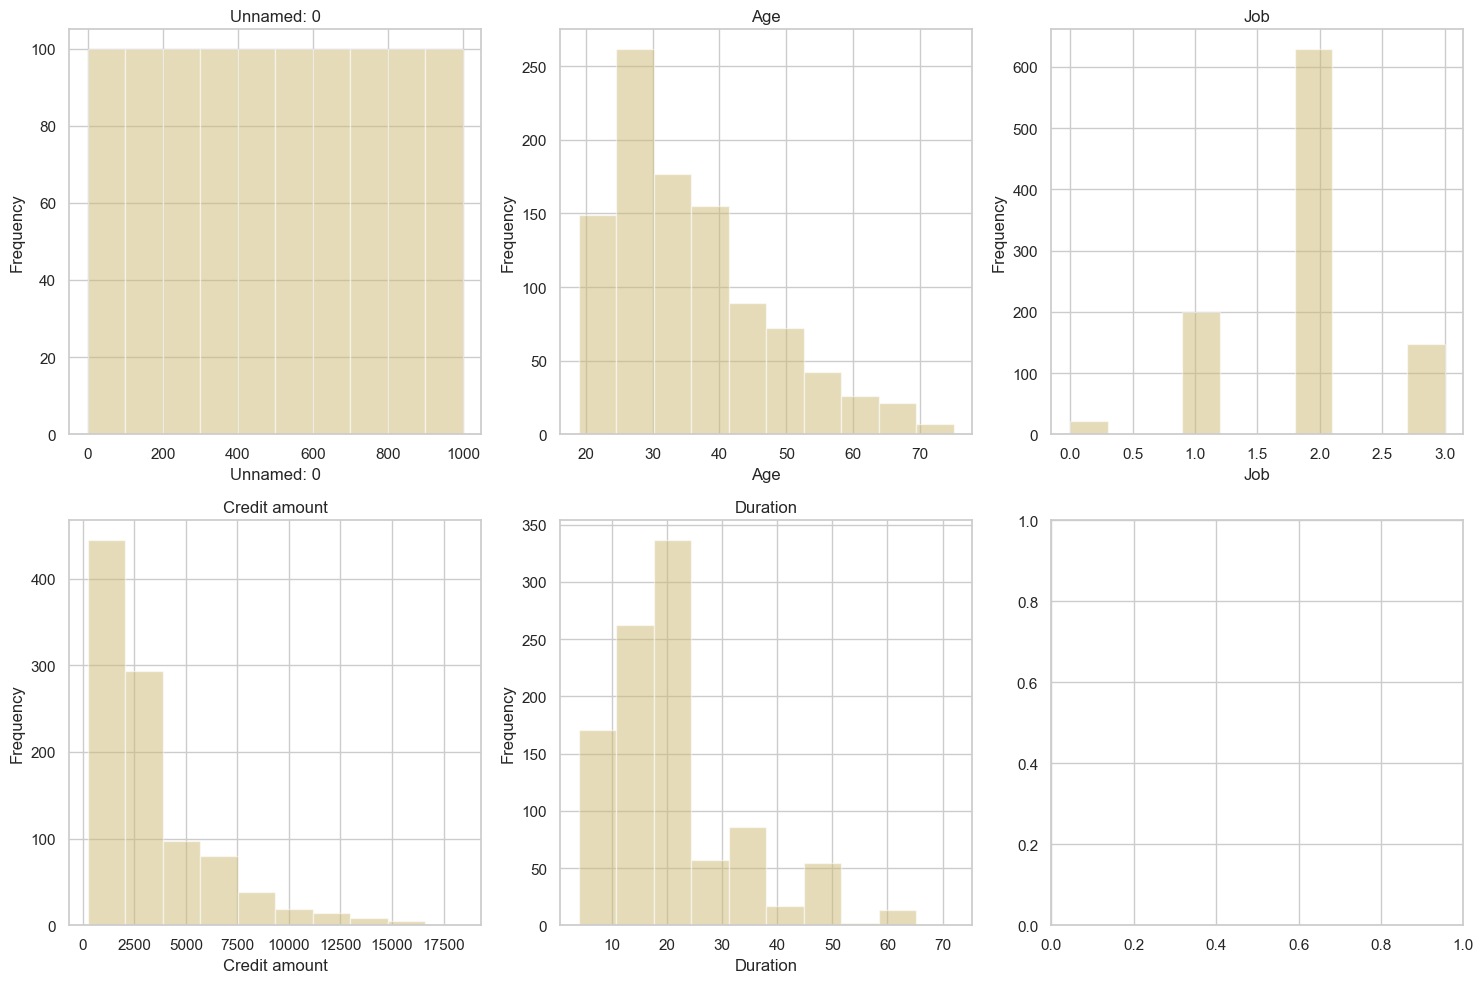

In [297]:
import matplotlib.pyplot as plt

num_cols = [col for col in df.columns if df[col].dtype != 'object' and col != "Id"]
print('Número de Variáveis Numéricas: ', len(num_cols))

def hist_for_nums(df, numeric_cols):
    num_plots = len(numeric_cols)
    num_cols_per_row = 3  # Define o número de colunas por linha
    num_rows = num_plots // num_cols_per_row + (num_plots % num_cols_per_row > 0)  # Calcula o número de linhas necessárias
    fig, axs = plt.subplots(num_rows, num_cols_per_row, figsize=(15, 5*num_rows))  # Cria uma figura com o número adequado de subplots
    for i, col in enumerate(numeric_cols):
        row = i // num_cols_per_row
        col = i % num_cols_per_row
        df[numeric_cols[i]].plot.hist(alpha=0.5, color='y', ax=axs[row, col])  # Alteração aqui para acessar o subplot corretamente
        axs[row, col].set_xlabel(numeric_cols[i])  # Usar o nome da coluna como rótulo
        axs[row, col].set_title(numeric_cols[i])  # Usar o nome da coluna como título
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de gráficos
    plt.show()

hist_for_nums(df, num_cols)


Viewing distribution by age

In [298]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

df_good = df.loc[df["Risk"] == 'good']['Age'].values.tolist()
df_bad = df.loc[df["Risk"] == 'bad']['Age'].values.tolist()
df_age = df['Age'].values.tolist()

# First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)

# Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)

# Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

# Creating the grid
fig = make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                    subplot_titles=('Good','Bad', 'General Distribuition'))
#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\marlu\AppData\Local\Temp\ipykernel_19160\3003465868.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\marlu\AppData\Local\Temp\ipykernel_19160\3003465868.py:9: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




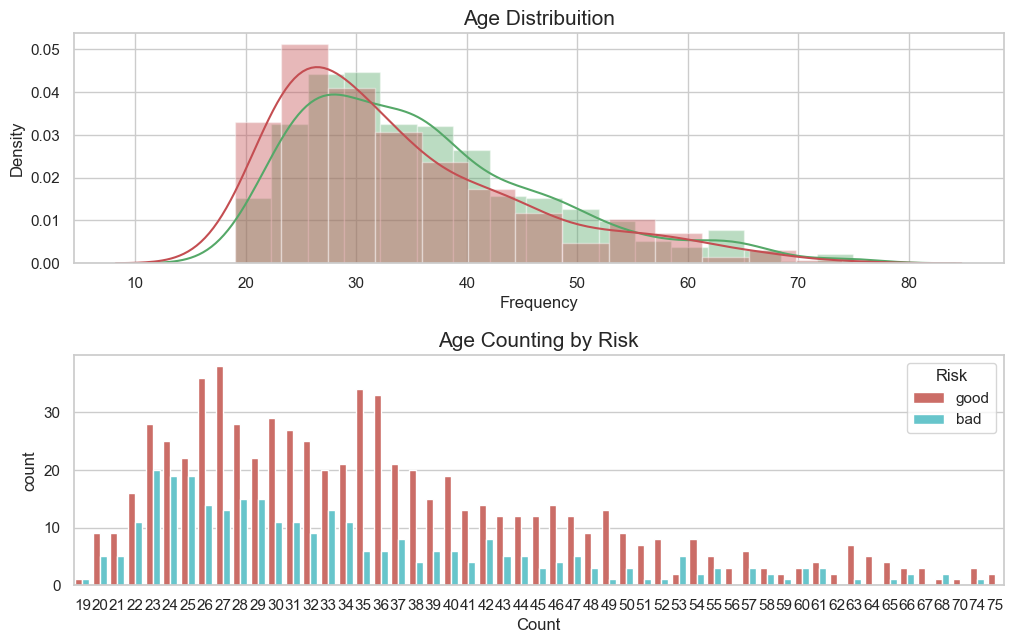

In [299]:
df_good = df[df["Risk"] == 'good']
df_bad = df[df["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

Gráfico de Distribuição de Idade por Risco:

No primeiro gráfico, observamos a sobreposição das distribuições de idade para os clientes considerados "good" (verde) e "bad" (vermelho).
Podemos notar que a distribuição de idade para clientes "good" parece ser mais ampla e tende a ser mais uniforme em comparação com a distribuição de idade para clientes "bad".
No entanto, há uma sobreposição considerável entre as duas distribuições, o que indica que a idade por si só pode não ser um fator determinante na predição do risco de crédito. Outros fatores podem estar influenciando a classificação de risco.

Gráfico de Contagem de Idade por Risco:

No segundo gráfico, observamos a contagem de clientes em diferentes faixas etárias divididos pelo risco de crédito.
Podemos observar que as faixas etárias mais representadas para ambos os grupos "good" e "bad" estão entre aproximadamente 20 e 40 anos.
No entanto, a proporção de clientes "bad" parece ser maior em faixas etárias mais jovens, enquanto a proporção de clientes "good" aumenta em faixas etárias mais avançadas.
Isso sugere que clientes mais jovens podem ter uma probabilidade maior de serem classificados como "bad", enquanto clientes mais velhos têm uma probabilidade maior de serem classificados como "good".

<Figure size 1000x600 with 0 Axes>

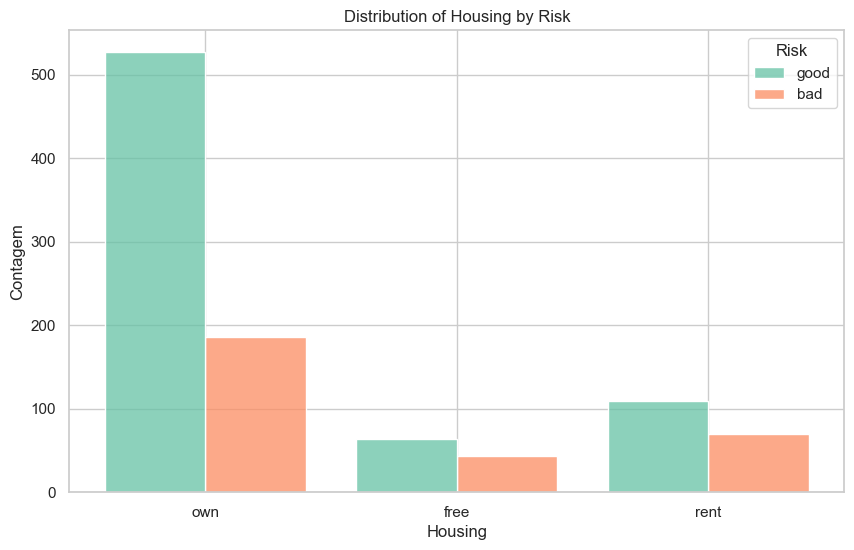

In [300]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um gráfico de barras com grade de fundo
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Housing', hue='Risk', multiple='dodge', shrink=0.8, palette='Set2')
plt.title('Distribution of Housing by Risk')
plt.xlabel('Housing')
plt.ylabel('Contagem')
plt.show()


Observando o grafico pode-se ver que ha um número significativamente maior de indivíduos com um bom risco ("good") em comparação com um risco ruim ("bad"). Isso sugere que possuir uma casa pode estar associado a um risco de crédito melhor, ou seja, indivíduos que possuem suas casas ("own") geralmente têm maior estabilidade financeira, o que pode ser um indicador de um risco de crédito melhor. 

Aqueles que alugam ("rent") podem ter diferentes níveis de estabilidade financeira. O aluguel não necessariamente indica um alto risco de crédito, mas pode refletir uma faixa de renda variável ou preferências pessoais. A distribuição mais equilibrada pode sugerir que o aluguel não é um forte indicador de risco de crédito por si só.

Indivíduos que vivem de graça ("free") podem ter situações variadas, como morar com familiares. Essa categoria pode ter menos pessoas, mas a análise da distribuição dos riscos dentro dessa categoria pode revelar se a moradia gratuita está associada a alguma forma de suporte financeiro ou dependência, influenciando o risco de crédito.



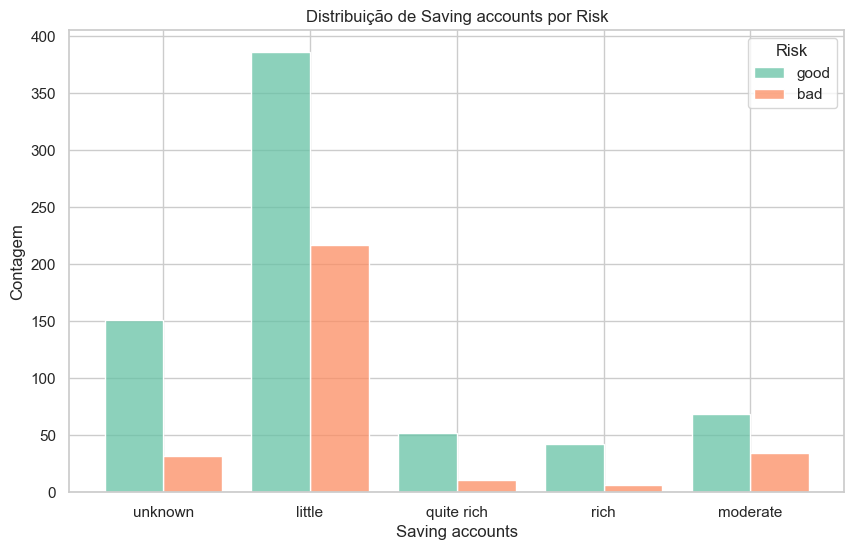

In [301]:

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Saving accounts', hue='Risk', multiple='dodge', shrink=0.8, palette='Set2')
plt.title('Distribuição de Saving accounts por Risk')
plt.xlabel('Saving accounts')
plt.ylabel('Contagem')
plt.show()


Categoria "little": Esta categoria pode ter um número significativo de indivíduos tanto com risco "good" quanto "bad".
A presença de muitas pessoas com uma pequena quantia em poupança pode indicar maior vulnerabilidade financeira, o que pode ser associado a um risco de crédito maior. 

Categoria "moderate": A distribuição pode mostrar um equilíbrio ou uma leve inclinação para um dos níveis de risco.
Indivíduos com poupança moderada podem ter uma melhor capacidade financeira em comparação com aqueles com pouca poupança, mas ainda podem estar em uma posição intermediária de risco.

Categoria "quite rich" e "rich":Essas categorias podem ter mais indivíduos com risco "good". Ter uma quantidade significativa em poupança geralmente indica maior segurança financeira e melhor capacidade de pagar dívidas, associando-se a um menor risco de crédito.

Visualizando Distribuição do Valor do Crédito por Nível de Risco

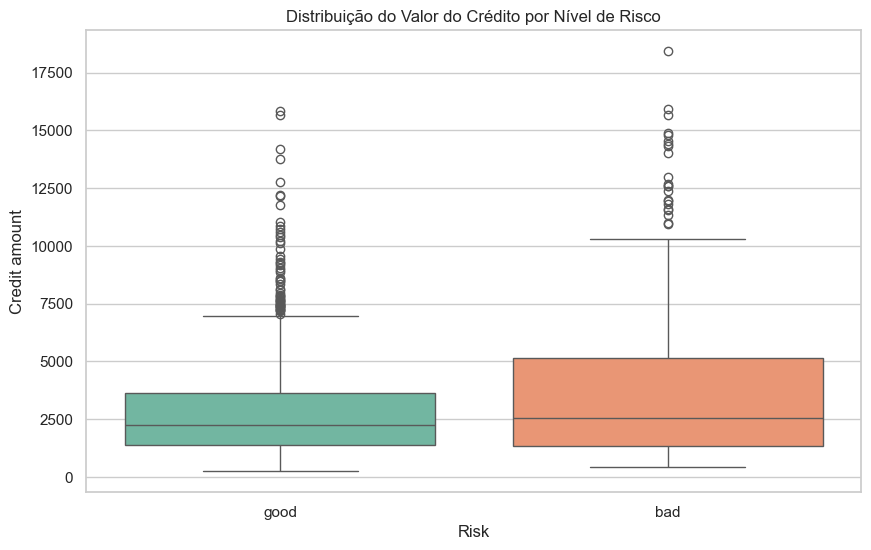

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Risk', y='Credit amount', palette='Set2')
plt.title('Distribuição do Valor do Crédito por Nível de Risco')
plt.xlabel('Risk')
plt.ylabel('Credit amount')
plt.show()


In [303]:
import plotly.graph_objects as go

# Separar os dados para cada nível de risco
good_credit = df[df['Risk'] == 'good']['Credit amount']
bad_credit = df[df['Risk'] == 'bad']['Credit amount']

# Criar traços de densidade para cada nível de risco
trace1 = go.Violin(
    y=good_credit,
    box_visible=True,
    line_color='blue',
    meanline_visible=True,
    name='Good Credit',
    points='all',
    jitter=0.05
)

trace2 = go.Violin(
    y=bad_credit,
    box_visible=True,
    line_color='red',
    meanline_visible=True,
    name='Bad Credit',
    points='all',
    jitter=0.05
)

# Criar layout para o gráfico
layout = go.Layout(
    title='Distribution of Credit Amount by Risk Level',
    yaxis=dict(title='Credit amount'),
    violingap=0.5
)

# Criar figura
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Mostrar o gráfico
fig.show()


Os gráficos indicam como os valores de crédito se distribuem entre os grupos de risco "good" e "bad".

Distribuição dos Valores de Crédito: O gráfico de violino mostra uma maior densidade em valores de crédito menores para "bad" risk, isso pode sugerir que clientes com créditos mais baixos têm maior probabilidade de serem classificados como "bad".
O boxplot pode mostrar que a mediana do valor de crédito para "good" risk é maior, sugerindo que clientes com créditos maiores têm maior probabilidade de serem classificados como "good".

Variabilidade e Outliers: A presença de muitos outliers no grupo "bad" risk no boxplot pode indicar maior variabilidade nos valores de crédito concedidos a clientes de maior risco.O gráfico de violino pode complementar isso mostrando uma distribuição mais larga e menos concentrada para "bad" risk.


Visualizando Distribution of Loan Duration by Credit Risk

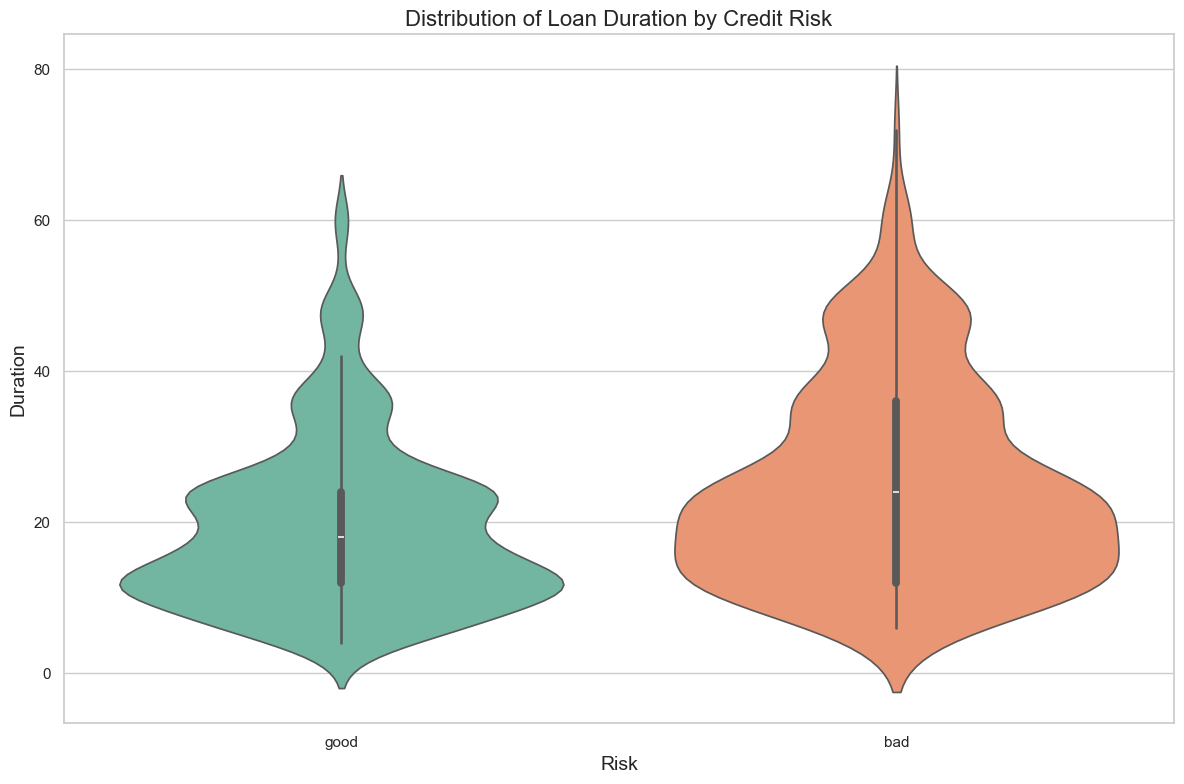

In [304]:
# Remover colunas desnecessárias
df = df.drop(columns=["Unnamed: 0"])

# Configurar o gráfico de violino
plt.figure(figsize=(12, 8))

# Criar o gráfico de violino
sns.violinplot(data=df, x='Risk', y='Duration', palette='Set2')

# Ajustar o título e os rótulos dos eixos
plt.title('Distribution of Loan Duration by Credit Risk', fontsize=16)
plt.xlabel('Risk', fontsize=14)
plt.ylabel('Duration', fontsize=14)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


Observando o gráfico, pode-se notar que a distribuição para "bad" é mais ampla e apresenta maior densidade em durações mais longas. Isso sugere que empréstimos com durações mais extensas têm uma probabilidade maior de serem classificados como "bad".

Visualizando Comparison of Sex and Risk

In [305]:
import pandas as pd
import plotly.express as px

# Carregar os dados
df = pd.read_csv("german_credit_data.csv")

# Criar um gráfico de mosaico para comparar 'Sex' e 'Risk'
fig = px.sunburst(df, path=['Sex', 'Risk'], title="Distribuição de Risco por Sexo")

# Configurar o layout para melhorar a visualização
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Mostrar o gráfico
fig.show()


Visualizando Comparison of Sex and Purpose

In [306]:

# Criando um gráfico de mosaico para comparar 'Sex' e 'Purpose'
fig = px.sunburst(df, path=['Sex', 'Purpose'], title="Comparison of Sex and Purpose")

# Configurando o layout para melhorar a visualização
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


Podemos observar que o sexo masculino tende a solicitar empréstimos com maior frequência em comparação ao público feminino. No entanto, ao analisarmos a média dos grupos de homens e mulheres, constatamos que há uma distribuição equilibrada entre ambos os sexos no que diz respeito aos propósitos dos empréstimos. Isso indica que, embora os homens peçam mais empréstimos em termos de quantidade, os motivos pelos quais homens e mulheres solicitam crédito são semelhantes em proporção. Em outras palavras, as razões para solicitar empréstimos não apresentam diferenças significativas entre os gêneros.

# 3. Data Preparation and Feature Engineering

A etapa de preparação de dados desempenha um papel fundamental no processo de análise de dados e modelagem. Consiste em uma série de procedimentos destinados a garantir que os dados estejam limpos, organizados e prontos para análise. Este resumo destaca as principais atividades realizadas durante a etapa de preparação de dados.

1. Limpeza de Dados:
A limpeza de dados envolve a identificação e o tratamento de valores ausentes, inconsistências e erros nos dados. Isso inclui técnicas como preenchimento de valores ausentes, remoção de outliers e correção de erros de digitação.

2. Transformação de Dados:
A transformação de dados é realizada para converter os dados em um formato mais adequado para análise. Isso pode incluir a conversão de tipos de dados, normalização de variáveis numéricas e codificação de variáveis categóricas.

3. Seleção de Recursos:
A seleção de recursos visa identificar e selecionar os recursos mais relevantes para análise ou modelagem. Isso pode envolver a criação de novas variáveis, remoção de variáveis redundantes ou irrelevantes e dimensionamento de recursos.

4. Tratamento de Dados Desequilibrados:
Se houver desequilíbrio entre as classes em problemas de classificação, técnicas específicas podem ser aplicadas para lidar com isso, como oversampling, undersampling ou o uso de algoritmos específicos para dados desequilibrados.

Em resumo, a etapa de preparação de dados é essencial para garantir a qualidade e a adequação dos dados para análise e modelagem. 


# 3.1. Missing Values Analysis

In [221]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na


missing_values_table(df)

                  n_miss  ratio
Checking account     394   39.4
Saving accounts      183   18.3


['Saving accounts', 'Checking account']

Filling missing values with mode

In [222]:
df["Saving accounts"].fillna(df['Saving accounts'].mode()[0], inplace=True)
df["Checking account"].fillna(df['Checking account'].mode()[0], inplace=True)

Estes comandos foram utilizado para identificar e quantificar os valores ausentes no conjunto de dadose preencher os valores ausentes nas colunas "Saving accounts" e "Checking account" com o valor mais frequente (moda) em cada uma dessas colunas.

In [223]:
# Definindo os limites das faixas etárias
limites_idade = [0, 30, 60, float('inf')]  # As faixas são: 0-30, 31-60, acima de 60

# Definindo os rótulos para as faixas etárias
rotulos_idade = ['young', 'adult', 'senior']

# Criando uma nova coluna com base nos limites de idade
df['Age_cat'] = pd.cut(df['Age'], bins=limites_idade, labels=rotulos_idade, right=False)

# Exibindo as primeiras linhas do DataFrame com a nova coluna
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,0,67,male,2,own,little,little,1169,6,radio/TV,good,senior
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,young
2,2,49,male,1,own,little,little,2096,12,education,good,adult
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,adult
4,4,53,male,2,free,little,little,4870,24,car,bad,adult


# 3.2. Outliers Analysis

Identificando os Outliers

Definindo limites (limites inferior e superior) para valores discrepantes e usando-os para valores discrepantes

In [224]:
# Function to detect outliers
def detect_outliers(df):
    outliers = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
            outliers[col] = outlier_indices
    return outliers

# Detect outliers
outliers_dict = detect_outliers(df)

# Print columns with outliers and their respective row indices
for col, indices in outliers_dict.items():
    if len(indices) > 0:
        print(f'Column "{col}" has {len(indices)} outliers')


Column "Age" has 23 outliers
Column "Job" has 370 outliers
Column "Credit amount" has 72 outliers
Column "Duration" has 70 outliers


In [225]:
# Function to replace outliers with limits
def replace_outliers_with_limits(df):
    new_df = df.copy()  # To avoid changing the original DataFrame
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):  # Check if the column is numeric
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            # Replace outlier values with limits
            new_df[col] = new_df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return new_df

# Apply the function to replace outliers
new_df = replace_outliers_with_limits(df)



Este código interou sobre cada coluna do DataFrame calculando os limites inferior e superior usando o intervalo interquartil (IQR).
Substituiu os valores discrepantes (fora desses limites) pelos limites, apos retornou um novo DataFrame com os valores discrepantes substituídos pelos limites. Depois de executar esse código, o DataFrame new_df contem os valores discrepantes substituídos pelos limites calculados.

In [226]:
new_df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_cat
0,0,64.5,male,2.0,own,little,little,1169.0,6.0,radio/TV,good,senior
1,1,22.0,female,2.0,own,little,moderate,5951.0,42.0,radio/TV,bad,young
2,2,49.0,male,2.0,own,little,little,2096.0,12.0,education,good,adult
3,3,45.0,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good,adult
4,4,53.0,male,2.0,free,little,little,4870.0,24.0,car,bad,adult


In [227]:
df.shape

(1000, 12)

In [228]:
print(new_df.describe())

        Unnamed: 0          Age     Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.0    1000.000000  1000.000000
mean    499.500000    35.453500     2.0    3051.101000    20.307000
std     288.819436    11.106324     0.0    2187.140403    10.615151
min       0.000000    19.000000     2.0     250.000000     4.000000
25%     249.750000    27.000000     2.0    1365.500000    12.000000
50%     499.500000    33.000000     2.0    2319.500000    18.000000
75%     749.250000    42.000000     2.0    3972.250000    24.000000
max     999.000000    64.500000     2.0    7882.375000    42.000000



Após o tratamento dos outliers, houve algumas mudanças nas estatísticas descritivas:

*A média da idade (Age) diminuiu ligeiramente.

*O desvio padrão da idade (Age) também diminuiu, indicando uma dispersão menor dos dados em torno da média.

*O valor máximo para a idade (Age) foi ajustado para 64.5, o que mostra que os outliers foram tratados.

*A média e o desvio padrão para o valor do crédito (Credit amount) foram reduzidos, sugerindo uma diminuição na dispersão dos valores do crédito.

*O valor máximo para a duração (Duration) foi ajustado para 42, indicando que os outliers foram tratados nessa coluna também.
Essas mudanças nas estatísticas descritivas refletem o impacto do tratamento dos outliers nos dados.










# 3.2.1 Visualização de Dado (boxplots) e histogramas, para comparar a distribuição dos dados antes e depois da remoção dos outliers.

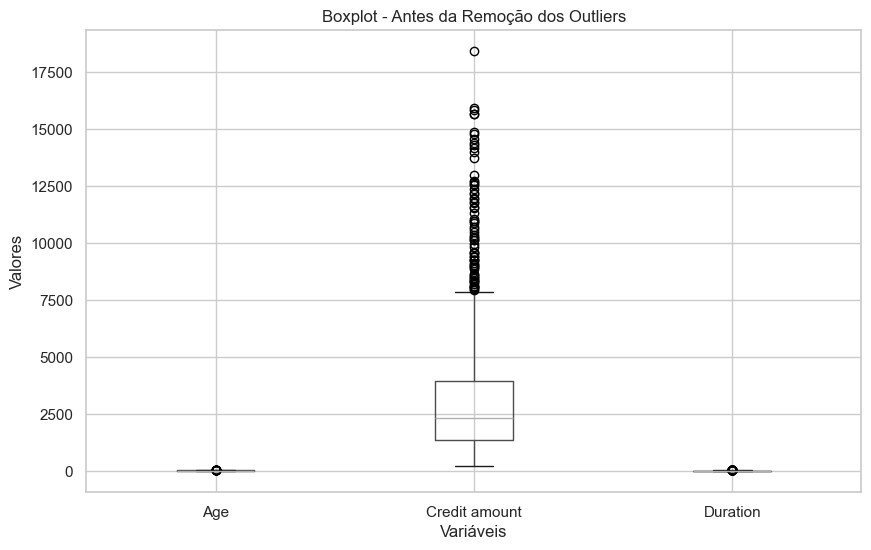

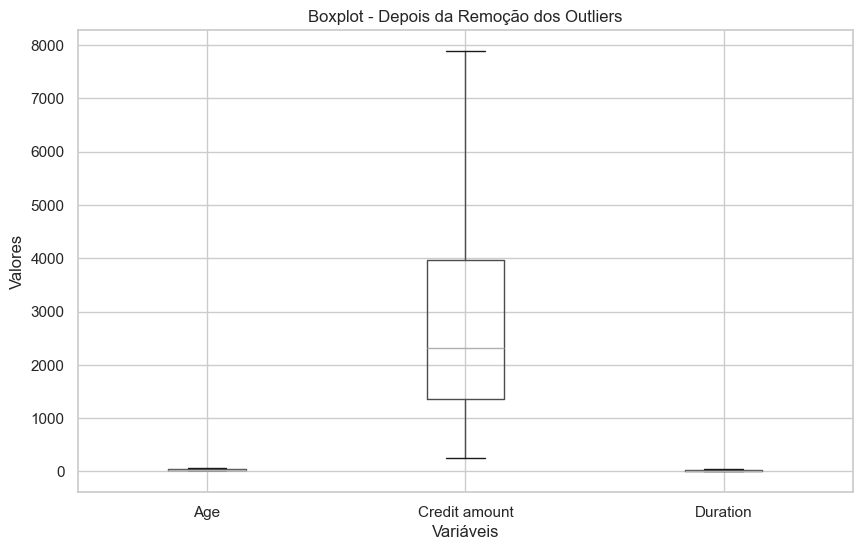

In [229]:
import matplotlib.pyplot as plt

# Boxplot antes da remoção dos outliers
plt.figure(figsize=(10, 6))
df.boxplot(column=['Age', 'Credit amount', 'Duration'])
plt.title('Boxplot - Antes da Remoção dos Outliers')
plt.ylabel('Valores')
plt.xlabel('Variáveis')
plt.show()

# Boxplot depois da remoção dos outliers
plt.figure(figsize=(10, 6))
new_df.boxplot(column=['Age', 'Credit amount', 'Duration'])
plt.title('Boxplot - Depois da Remoção dos Outliers')
plt.ylabel('Valores')
plt.xlabel('Variáveis')
plt.show()



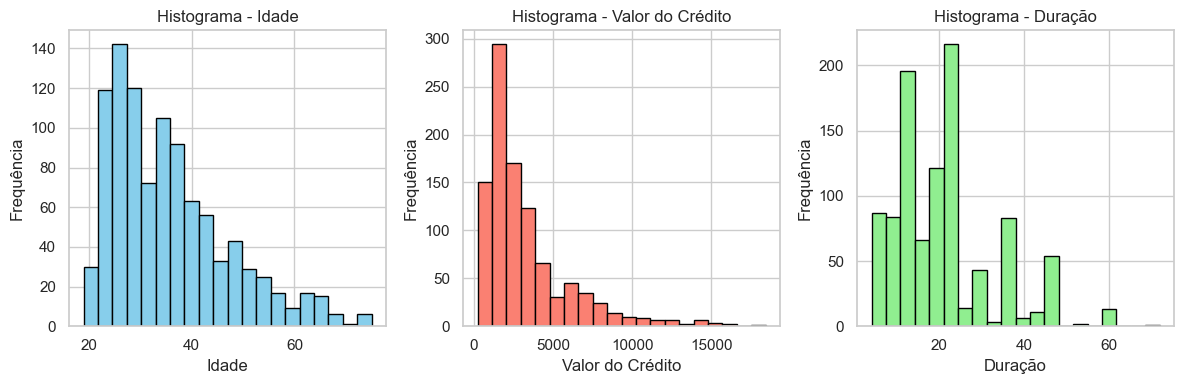

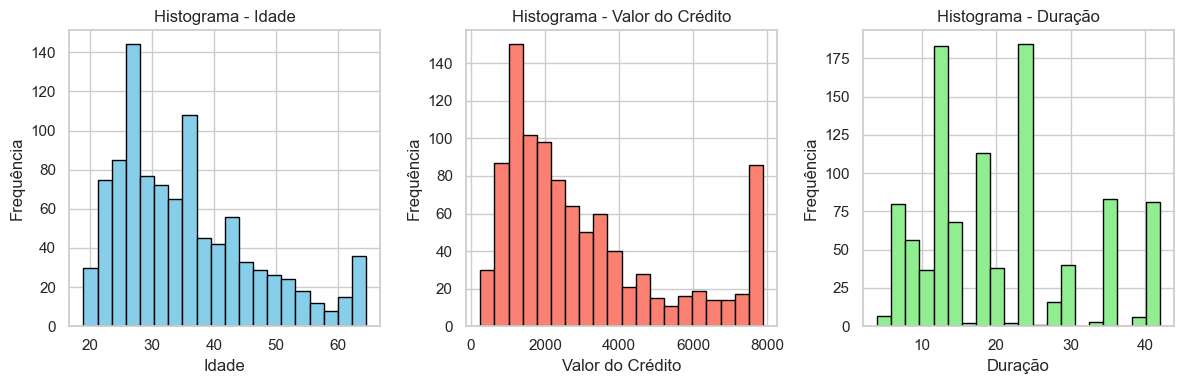

In [230]:
# Histogramas antes da remoção dos outliers
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma - Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
plt.hist(df['Credit amount'], bins=20, color='salmon', edgecolor='black')
plt.title('Histograma - Valor do Crédito')
plt.xlabel('Valor do Crédito')
plt.ylabel('Frequência')

plt.subplot(1, 3, 3)
plt.hist(df['Duration'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma - Duração')
plt.xlabel('Duração')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

# Histogramas depois da remoção dos outliers
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(new_df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma - Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.subplot(1, 3, 2)
plt.hist(new_df['Credit amount'], bins=20, color='salmon', edgecolor='black')
plt.title('Histograma - Valor do Crédito')
plt.xlabel('Valor do Crédito')
plt.ylabel('Frequência')

plt.subplot(1, 3, 3)
plt.hist(new_df['Duration'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histograma - Duração')
plt.xlabel('Duração')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()




# 3.3. Label Coding and One-Hot Coding

Transformando variáveis categóricas em variáveis dummy. Isso é feito para permitir que modelos de machine learning trabalhem com essas variáveis categóricas, que originalmente não poderiam ser diretamente usadas em muitos algoritmos.

In [231]:
#Purpose to Dummies Variable
#new_df = new_df.merge(pd.get_dummies(new_df.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
#new_df = new_df.merge(pd.get_dummies(new_df.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
#new_df = new_df.merge(pd.get_dummies(new_df.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
#new_df = new_df.merge(pd.get_dummies(new_df["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
#new_df = new_df.merge(pd.get_dummies(new_df.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
#new_df = new_df.merge(pd.get_dummies(new_df["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
#new_df = new_df.merge(pd.get_dummies(new_df["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [307]:
# Convert categorical columns to dummy variables
categorical_columns = ['Purpose', 'Sex', 'Housing', 'Saving accounts', 'Risk', 'Checking account', 'Age_cat']
for column in categorical_columns:
    if column in new_df.columns:
        dummies = pd.get_dummies(new_df[column], drop_first=True, prefix=column)
        new_df = pd.concat([new_df, dummies], axis=1)
        new_df.drop(column, axis=1, inplace=True)

new_df.head()

,Unnamed:_0,Age,Job,Credit_amount,Duration,Purpose_car,Purpose_domestic_appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,...,Housing_own,Housing_rent,Saving_accounts_moderate,Saving_accounts_quite_rich,Saving_accounts_rich,Risk_good,Checking_account_moderate,Checking_account_rich,Age_cat_adult,Age_cat_senior
0,-1.000,2.100,2.0,-0.441,-1.0,False,False,False,False,True,...,True,False,False,False,False,True,False,False,False,True
1,-0.998,-0.733,2.0,1.393,2.0,False,False,False,False,True,...,True,False,False,False,False,False,True,False,False,False
2,-0.996,1.067,2.0,-0.086,-0.5,False,False,True,False,False,...,True,False,False,False,False,True,False,False,True,False
3,-0.994,0.800,2.0,2.134,2.0,False,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,-0.992,1.333,2.0,0.978,0.5,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Eliminando variáveis categóricas e ao mesmo tempo antigas.

In [233]:
#droplist=["Sex","Housing","Saving accounts","Checking account","Purpose","Risk","Risk_good","Age_cat"]

#new_df.drop(droplist, axis= 1, inplace = True)

# 3.4. Standardization

In [234]:
print(new_df.columns)

Index(['Unnamed: 0', 'Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich', 'Risk_good', 'Checking account_moderate',
       'Checking account_rich', 'Age_cat_adult', 'Age_cat_senior'],
      dtype='object')


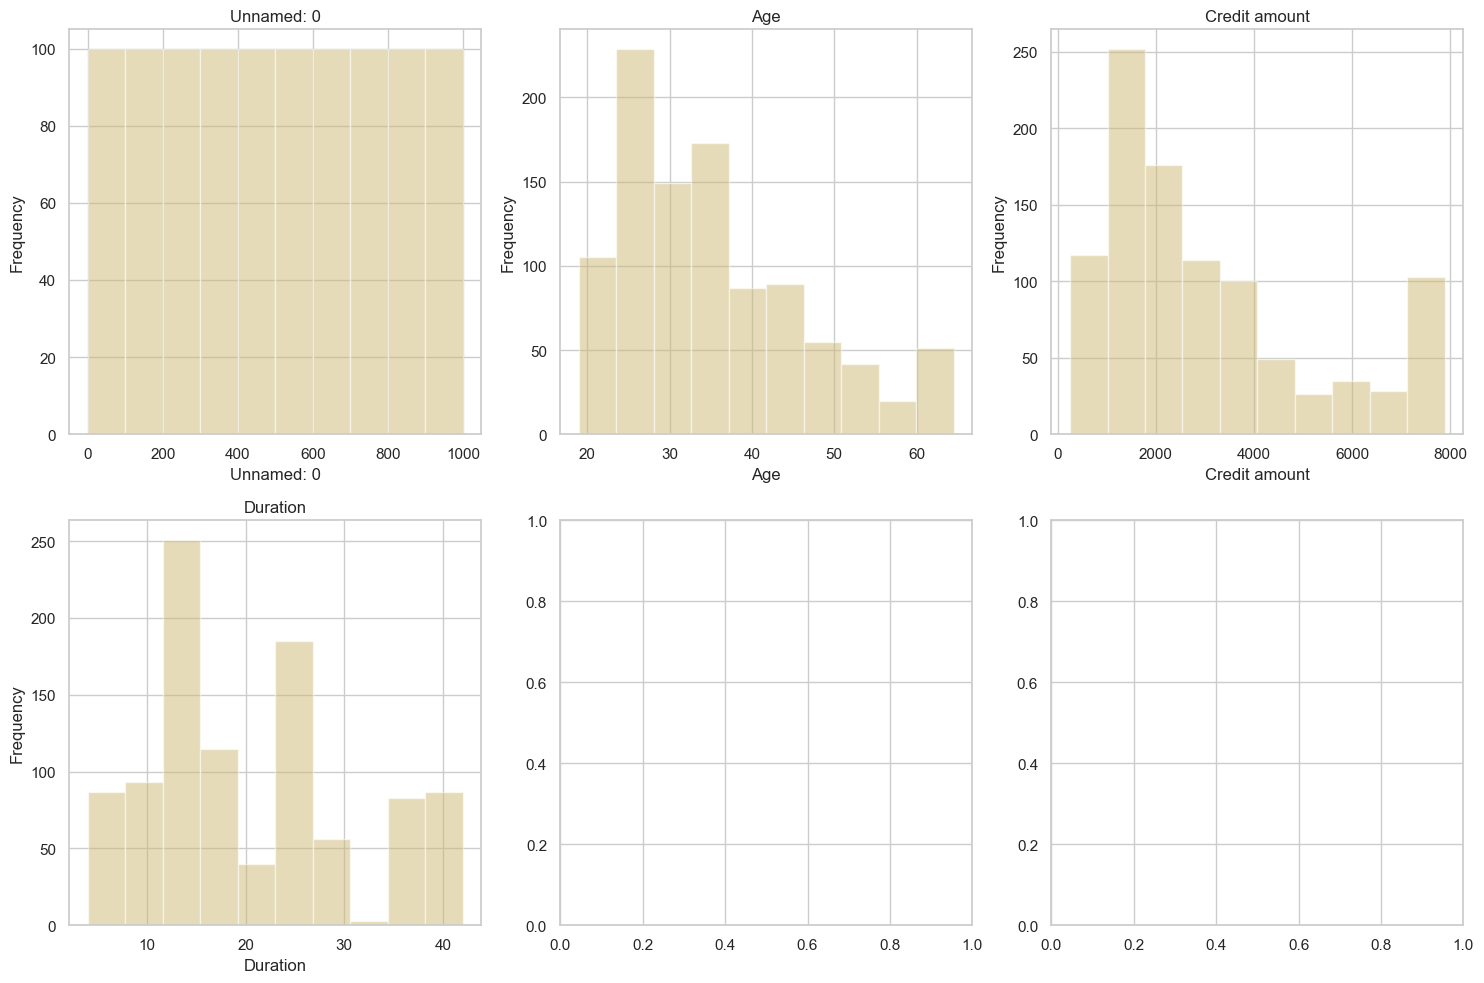

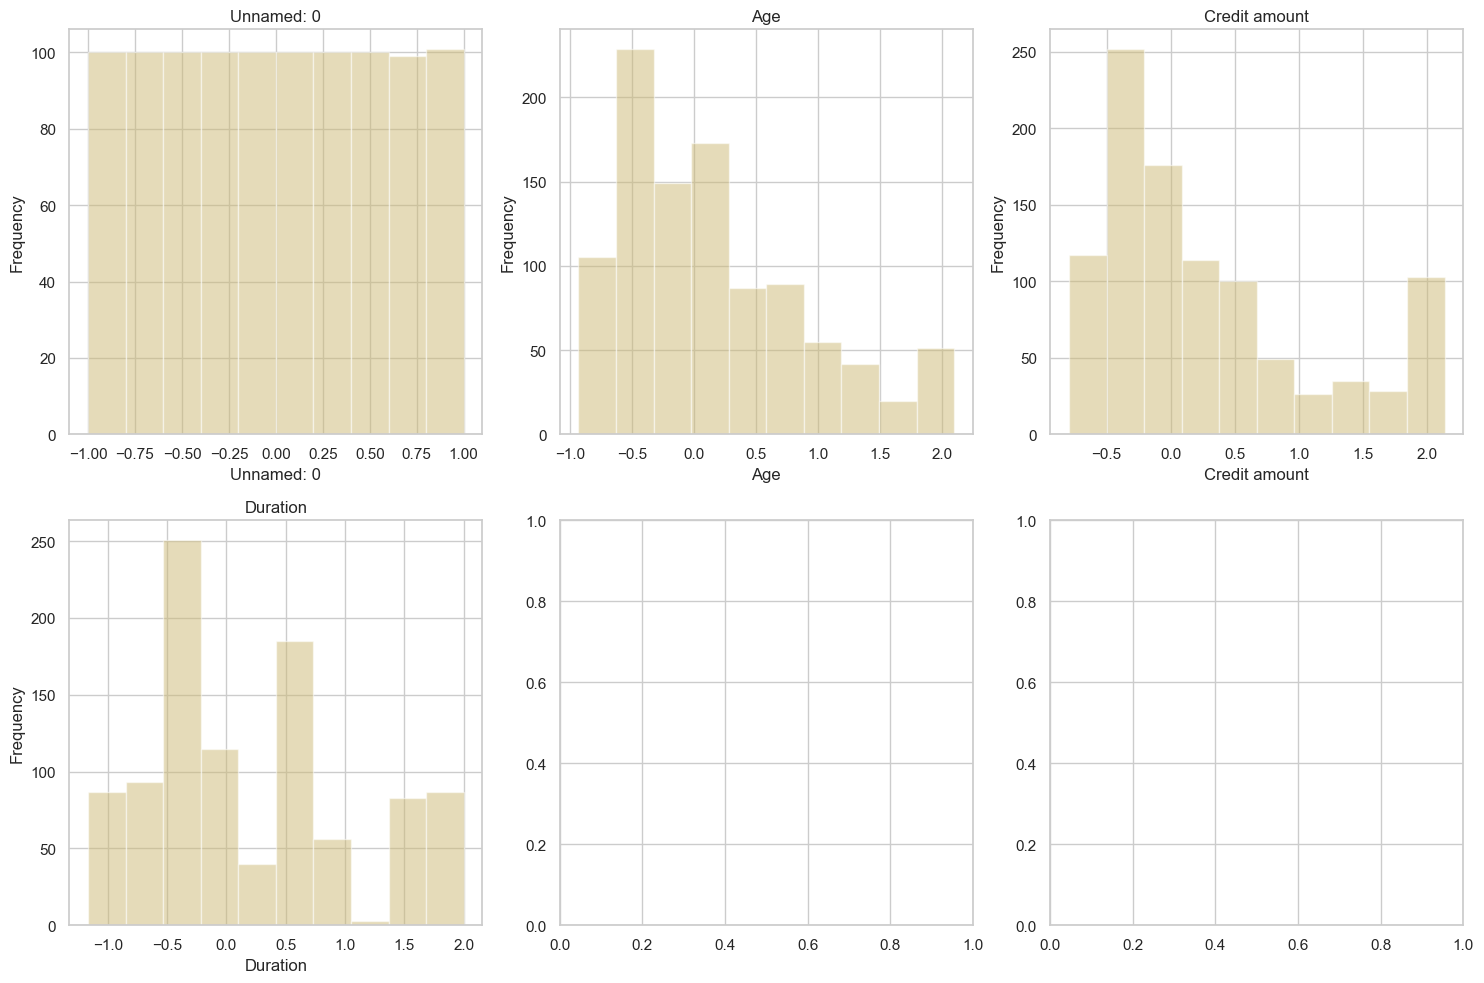

In [235]:
like_num = [col for col in new_df.columns if new_df[col].dtypes != 'O' and len(new_df[col].value_counts()) < 20]


cols_need_scale = [col for col in new_df.columns if col not in "Id"
                   and col not in "Risk"
                   and col not in like_num]

new_df[cols_need_scale].head()
new_df[cols_need_scale].describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T
hist_for_nums(new_df, cols_need_scale)


def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)


for col in cols_need_scale:
    new_df[col] = robust_scaler(new_df[col])


new_df[cols_need_scale].head()
new_df[cols_need_scale].describe().T
hist_for_nums(new_df, cols_need_scale)

In [236]:
#from sklearn.preprocessing import StandardScaler

# Selecionando apenas as colunas numéricas para padronização
#numeric_cols = ['Unnamed: 0', 'Age', 'Job', 'Credit amount', 'Duration', 'Purpose_car',
       #'Purpose_domestic appliances', 'Purpose_education',
      # 'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       #'Purpose_vacation/others', 'Sex_male', 'Housing_own', 'Housing_rent',
      # 'Savings_moderate', 'Savings_quite rich', 'Savings_rich', 'Risk_bad',
      # 'Check_moderate', 'Check_rich', 'Age_cat_adult', 'Age_cat_senior']

# Instanciando o objeto StandardScaler
#scaler = StandardScaler()

# Aplicando a padronização aos dados numéricos
#new_df[numeric_cols] = scaler.fit_transform(new_df[numeric_cols])


In [237]:
new_df.describe()



,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.0,1000.000000,1000.000000
mean,0.000000,0.163565,2.0,0.280644,0.192243
std,0.578289,0.740443,0.0,0.839037,0.884603
min,-1.000000,-0.933000,2.0,-0.794000,-1.167000
25%,-0.499750,-0.400000,2.0,-0.366250,-0.500000
50%,0.000000,0.000000,2.0,0.000000,0.000000
75%,0.499750,0.600000,2.0,0.634000,0.500000
max,1.000000,2.100000,2.0,2.134000,2.000000


Analisando os resultados da descrição estatística das colunas após a padronização, podemos observar que as médias das colunas são muito próximas de zero (0) e os desvios padrão são próximos de um (1). Isso sugere que as colunas foram padronizadas corretamente.Além disso, os valores mínimos e máximos das colunas também estão dentro de uma faixa razoável, o que indica que a padronização não introduziu nenhum problema significativo nos dados.

# 3.5. Correlation and Heatmap Analysis

Observando as correlações entre as variáveis alvo e independentes

<Axes: >

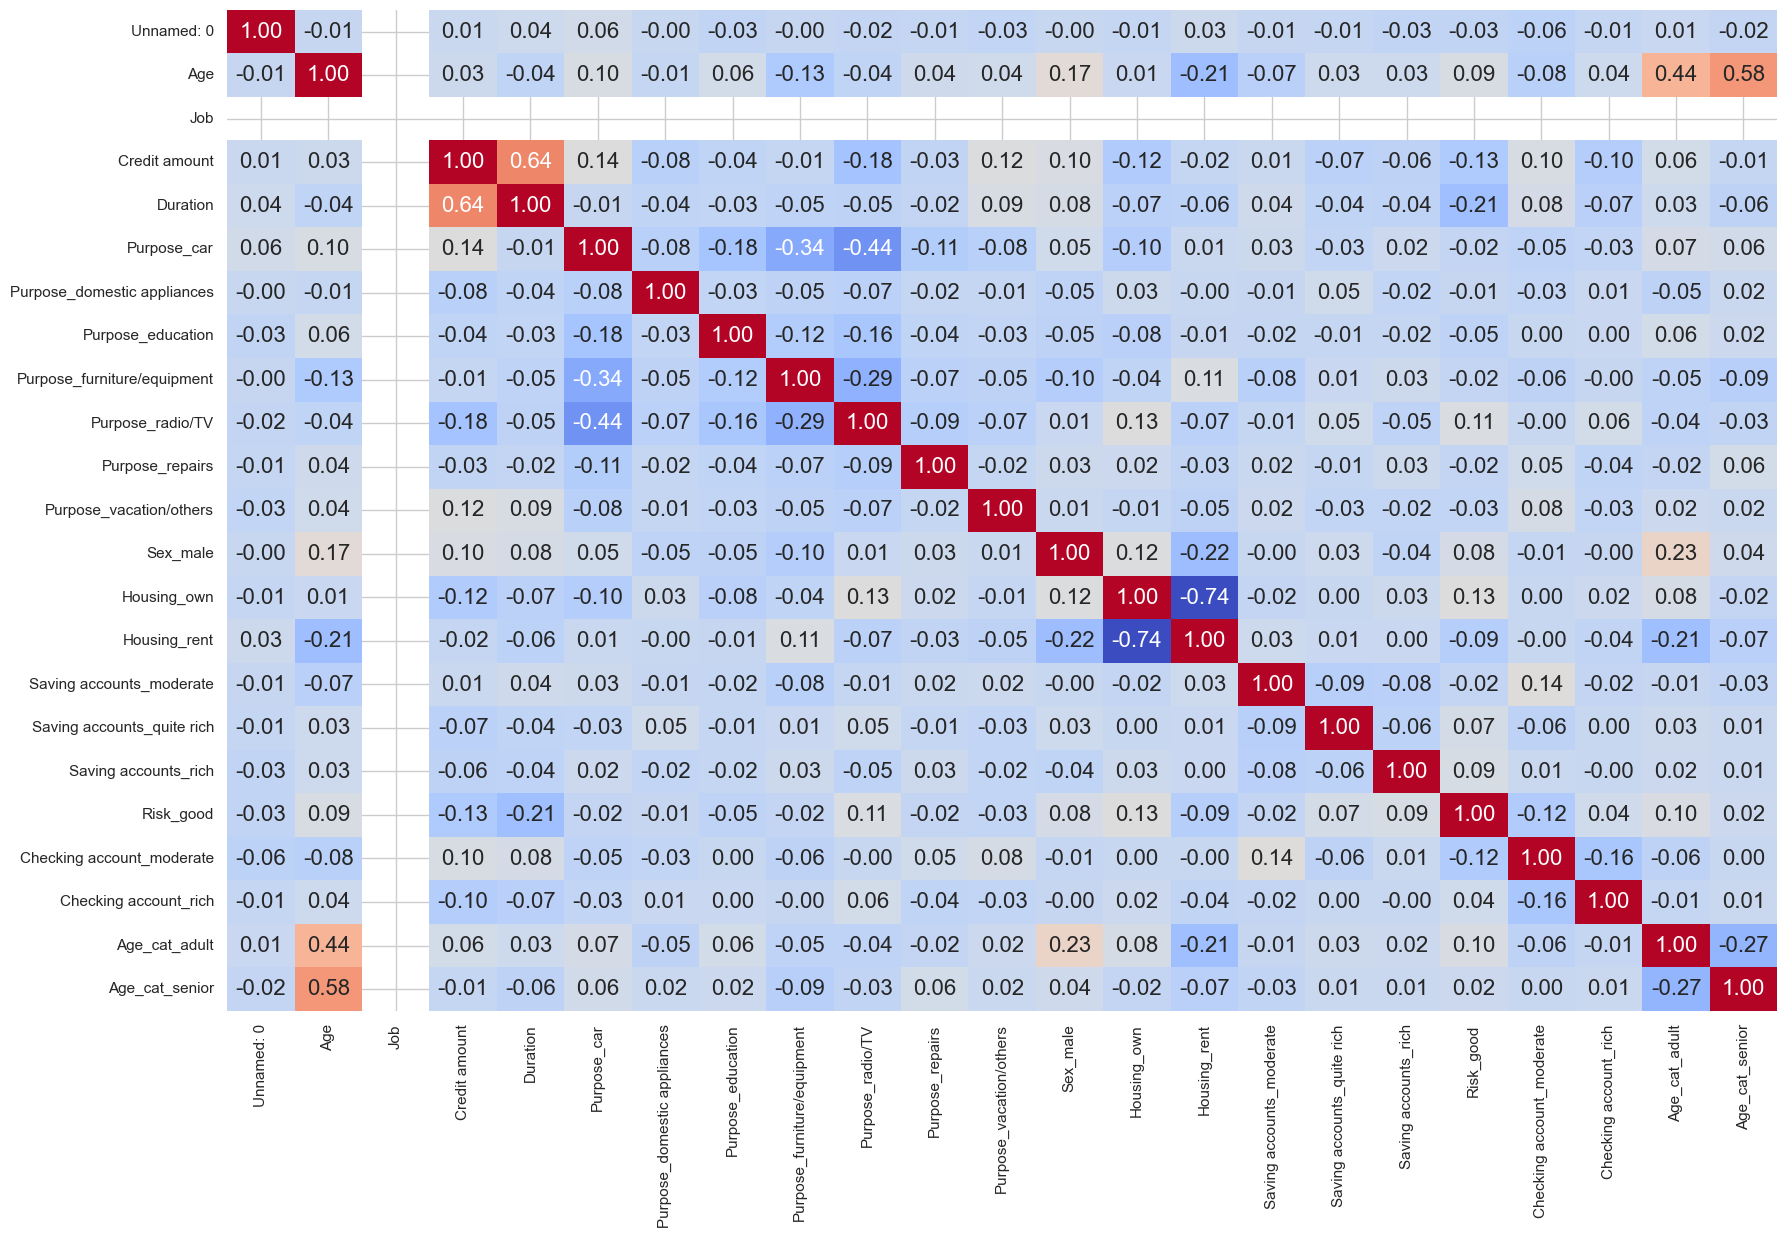

In [238]:
plt.figure(figsize=(20,13))
sns.heatmap(new_df.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={'size':16},
            cbar=False)

# 4. Implementação de Algoritmos de Aprendizado de Máquina

In [239]:
!pip install xgboost lightgbm


In [309]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [310]:
# Rename columns to avoid special characters
new_df.columns = [c.replace(' ', '_').replace('.', '_').replace(',', '_').replace(';', '_') for c in new_df.columns]
# Create variables X and y
X = new_df.drop('Risk_good', axis=1).values
y = new_df['Risk_good'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Check the size of datasets
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

# Set the seed for reproducibility
seed = 7

# Prepare the list of models
models = []
models.append(('LGR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGBM', XGBClassifier()))

# Rate each model in the list
results = []
names = []
scoring = 'recall'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



Training set size: 750
Test set size: 250
LGR: 0.918761 (0.048739)
LDA: 0.904544 (0.058285)
KNN: 0.870510 (0.057238)
CART: 0.739118 (0.043429)
NB: 0.735240 (0.083067)
RF: 0.871098 (0.051071)
SVM: 0.994915 (0.015254)
XGBM: 0.806996 (0.051527)


O dataset foi dividido em 750 amostras para treinamento e 250 amostras para teste. O conjunto de treinamento é usado para ajustar os modelos, enquanto o conjunto de teste é usado para avaliar o desempenho dos modelos.

Desempenho dos Modelos

Logistic Regression (LGR): 0.918761 (0.048739)

Recall médio: 91.88%
Desvio padrão: 4.87%
Modelo estável com alta recall, indicando que identifica bem as amostras positivas.
Linear Discriminant Analysis (LDA): 0.904544 (0.058285)

Recall médio: 90.45%
Desvio padrão: 5.83%
Bom desempenho com uma ligeira variação entre os folds.
K-Nearest Neighbors (KNN): 0.870510 (0.057238)

Recall médio: 87.05%
Desvio padrão: 5.72%
Menor recall comparada aos modelos LGR e LDA, mas ainda bom.
Decision Tree Classifier (CART): 0.754071 (0.035675)

Recall médio: 75.41%
Desvio padrão: 3.57%
Desempenho mais baixo e relativamente estável.
Gaussian Naive Bayes (NB): 0.735240 (0.083067)

Recall médio: 73.52%
Desvio padrão: 8.31%
Desempenho semelhante ao CART, mas com maior variação entre os folds.
Random Forest (RF): 0.875435 (0.062483)

Recall médio: 87.54%
Desvio padrão: 6.25%
Bom desempenho e estabilidade razoável.
Support Vector Machine (SVM): 0.994915 (0.015254)

Recall médio: 99.49%
Desvio padrão: 1.53%
Excelente desempenho com muito pouca variação, indicando alta precisão e robustez.
XGBoost (XGBM): 0.806996 (0.051527)

Recall médio: 80.70%
Desvio padrão: 5.15%
Desempenho bom, mas inferior ao LGR, LDA, KNN e RF.


Interpretação dos Resultados

Melhor Desempenho:

O SVM (Support Vector Machine) teve o melhor desempenho em termos de recall médio (99.49%) e estabilidade (desvio padrão de 1.53%). Isso significa que o SVM é excelente em identificar corretamente as amostras positivas (ou "Risk_good").

Modelos Alternativos Fortes:

Logistic Regression (91.88%) e Linear Discriminant Analysis (90.45%) também apresentaram bom desempenho com variação moderada.
Random Forest (87.54%) também teve um bom desempenho, com um recall alto e uma variação aceitável.

Modelos Com Desempenho Inferior:

Decision Tree (75.41%) e Gaussian Naive Bayes (73.52%) apresentaram o menor desempenho, indicando que são menos eficazes em identificar corretamente as amostras positivas.

XGBoost (80.70%) teve desempenho razoável, mas inferior aos modelos mencionados acima.

Conclusão

SVM é o melhor modelo, devido ao seu recall elevado e baixa variação.

Modelos Logistic Regression e LDA: São boas alternativas com bom desempenho e podem ser considerados.

Modelos de Desempenho Inferior: Decision Tree e Naive Bayes apresentaram desempenho inferior e podem não ser ideais para este conjunto de dados.

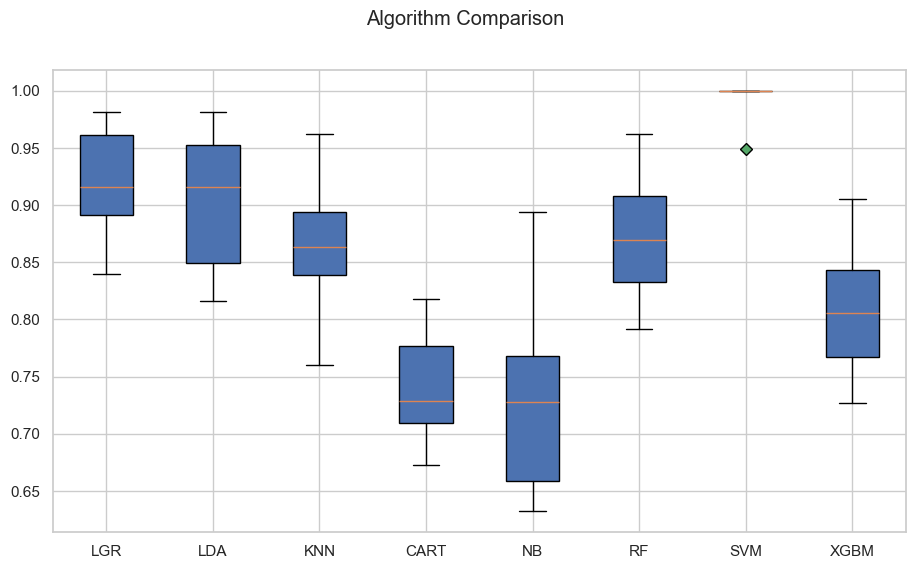

In [311]:
# Comparison of algorithms with boxplot
fig = plt.figure(figsize=(11, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
green_diamond = dict(markerfacecolor='g', marker='D')
plt.boxplot(results, flierprops=green_diamond, patch_artist=True)
ax.set_xticklabels(names)
plt.show()


In [312]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score

# Definir as features e o FeatureUnion
features = []
features.append(('variance_threshold', VarianceThreshold()))  # Remover features constantes
features.append(('PCA', PCA(n_components=2)))
features.append(('Select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

# Criar o pipeline
estimators = []
estimators.append(('Feature_union', feature_union))
estimators.append(('Logistic_regression', LogisticRegression()))
model = Pipeline(estimators)

# Avaliar o pipeline
seed = 7
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print("Cross-validation mean score:", results.mean())

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo no conjunto de teste
print("Test predict accuracy score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Weighted harmonic mean of precision according to Test prediction:", fbeta_score(y_test, y_pred, beta=2))


C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [2] are constant.

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [2] are constant.

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [2] are constant.

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Featu

Cross-validation mean score: 0.716
Test predict accuracy score: 0.69
Confusion Matrix:
 [[ 15  57]
 [ 20 158]]
Weighted harmonic mean of precision according to Test prediction: 0.8522114347357066


C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning:

Features [2] are constant.

C:\Users\marlu\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

invalid value encountered in divide



PS: Tentando comparar os resultados de ambos os modelos para poder ajudar a decidir qual deles é mais adequado para a análise de risco de crédito com base em métricas como recall, precisão e interpretabilidade.

In [313]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Suposição de que new_df já foi carregado e pré-processado
# Exemplo para criar o dataframe new_df (você deve usar o seu próprio dataframe)
# new_df = pd.read_csv('seu_arquivo.csv')

# Renomear colunas para evitar caracteres especiais
new_df.columns = [c.replace(' ', '_').replace('.', '_').replace(',', '_').replace(';', '_') for c in new_df.columns]

# Criar as variáveis X e y
X = new_df.drop('Risk_good', axis=1).values
y = new_df['Risk_good'].values

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Avaliação da Regressão Logística
model_lgr = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
cv_results_lgr = cross_val_score(model_lgr, X_train, y_train, cv=kfold, scoring='recall')
print(f"Logistic Regression Recall: {cv_results_lgr.mean()} ({cv_results_lgr.std()})")

# Avaliação da Análise Discriminante Linear
model_lda = LinearDiscriminantAnalysis()
cv_results_lda = cross_val_score(model_lda, X_train, y_train, cv=kfold, scoring='recall')
print(f"Linear Discriminant Analysis Recall: {cv_results_lda.mean()} ({cv_results_lda.std()})")

# Treinar o modelo escolhido
model_lgr.fit(X_train, y_train)
y_pred_lgr = model_lgr.predict(X_test)
print("Logistic Regression Test Accuracy:", accuracy_score(y_test, y_pred_lgr))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgr))
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lgr))

model_lda.fit(X_train, y_train)
y_pred_lda = model_lda.predict(X_test)
print("Linear Discriminant Analysis Test Accuracy:", accuracy_score(y_test, y_pred_lda))
print("Linear Discriminant Analysis Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("Linear Discriminant Analysis Classification Report:\n", classification_report(y_test, y_pred_lda))


Logistic Regression Recall: 0.9187612602199066 (0.04873895192745916)
Linear Discriminant Analysis Recall: 0.9045439386035972 (0.05828493087656318)
Logistic Regression Test Accuracy: 0.692
Logistic Regression Confusion Matrix:
 [[ 15  57]
 [ 20 158]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.43      0.21      0.28        72
        True       0.73      0.89      0.80       178

    accuracy                           0.69       250
   macro avg       0.58      0.55      0.54       250
weighted avg       0.65      0.69      0.65       250

Linear Discriminant Analysis Test Accuracy: 0.688
Linear Discriminant Analysis Confusion Matrix:
 [[ 17  55]
 [ 23 155]]
Linear Discriminant Analysis Classification Report:
               precision    recall  f1-score   support

       False       0.42      0.24      0.30        72
        True       0.74      0.87      0.80       178

    accuracy                           0.